In [19]:
import pandas as pd
import os
import requests
from config import pt_gkey
import gmaps
gmaps.configure(api_key=pt_gkey)

In [20]:
file_path = os.path.join("Resources","us-counties.csv")
df=pd.read_csv(file_path)

In [21]:
df_new=df.dropna()

In [22]:
#df_march=df_new[df_new['date']=='2020-03-11']

In [23]:
#df_march.sort_values(['cases'],ascending=False)

In [24]:
df_may=df_new[df_new['date']=='5/31/2020']

In [25]:
df_may.head()

,date,county,state,fips,cases,deaths
193780,5/31/2020,Autauga,Alabama,1001.0,221,4
193781,5/31/2020,Baldwin,Alabama,1003.0,290,9
193782,5/31/2020,Barbour,Alabama,1005.0,167,1
193783,5/31/2020,Bibb,Alabama,1007.0,75,1
193784,5/31/2020,Blount,Alabama,1009.0,62,1


In [26]:
df_may.reset_index(drop=True,inplace=True)

In [27]:
df_may.sort_values(['cases'],ascending=False)

,date,county,state,fips,cases,deaths
1743,5/31/2020,New York City,New York,36061.0,208085,21050
584,5/31/2020,Cook,Illinois,17031.0,77925,3642
193,5/31/2020,Los Angeles,California,6037.0,54996,2362
1742,5/31/2020,Nassau,New York,36059.0,40396,2615
1762,5/31/2020,Suffolk,New York,36103.0,39643,1949
...,...,...,...,...,...,...
1650,5/31/2020,Storey,Nevada,32029.0,1,0
1631,5/31/2020,Thomas,Nebraska,31171.0,1,0
1630,5/31/2020,Thayer,Nebraska,31169.0,1,0
1622,5/31/2020,Richardson,Nebraska,31147.0,1,0


In [28]:
dd=df_may[['fips','cases']]
gg=df_may.groupby(['fips'])

In [29]:
df_new_date=df_new[df_new['date']=='9/8/2020']
df_new_date.head()
df_new_date.reset_index(inplace=True,drop=True)
pt_topcases.reset_index(drop=True,inplace=True)
pt_top5=pt_topcases.head()

NameError: name 'pt_topcases' is not defined

In [30]:
df_new_date.head()
merged=pd.merge(df_new_date,dd,on='fips')
merged['rate']=(merged['cases_x']-merged['cases_y'])/merged['cases_y']
rate_df=merged.sort_values(['rate'],ascending=False)
rate_df.reset_index(drop=True,inplace=True)
rate_df.head()

,date,county,state,fips,cases_x,deaths,cases_y,rate
0,9/8/2020,Gulf,Florida,12045.0,846,13,1,845.0
1,9/8/2020,Bell,Kentucky,21013.0,430,9,1,429.0
2,9/8/2020,Harlan,Kentucky,21095.0,321,9,1,320.0
3,9/8/2020,Franklin,Florida,12037.0,569,3,2,283.5
4,9/8/2020,Brooks,Texas,48047.0,272,20,1,271.0


## Census Information

In [31]:
# Notes / comments from Tobias

# Please note that some 2019 Data for the ACS will be released on September 17th or later. Details found at the following: 
# https://www.census.gov/programs-surveys/acs/news/data-releases/2019/release-schedule.html

# Instead will get the 2014—2018 ACS 5-Year Narrative Profile. Snapshot / overview is at the following:     
# https://www.census.gov/acs/www/data/data-tables-and-tools/narrative-profiles/2018/report.php?geotype=nation&usVal=us

# Within this snapsot is education, employer type / industry,  occupation, how they commute to work,income, 
# population by age and sex, and type of housing (single family vs apartments / multi-unit). 

# Reference class example from Session 6.3 Geocoding on Census. 

In [32]:
# Python Wrapper for Census API 
from census import Census
import requests

In [33]:
# Census API Key
from config import api_key

In [34]:
# provide the api key and the year to establish a session
c = Census(api_key, year=2018)

In [35]:
# Set an option to allow up to 300 characters to print in each column
pd.set_option('max_colwidth', 300)

In [36]:
# query for ACS tables
tables = c.acs5.tables()

In [37]:
table_df=pd.DataFrame(tables)
table_df.head(50)

,name,description,variables
0,B17015,POVERTY STATUS IN THE PAST 12 MONTHS OF FAMILIES BY FAMILY TYPE BY SOCIAL SECURITY INCOME BY SUPPLEMENTAL SECURITY INCOME (SSI) AND CASH PUBLIC ASSISTANCE INCOME,https://api.census.gov/data/2018/acs/acs5/groups/B17015.json
1,B18104,SEX BY AGE BY COGNITIVE DIFFICULTY,https://api.census.gov/data/2018/acs/acs5/groups/B18104.json
2,B17016,POVERTY STATUS IN THE PAST 12 MONTHS OF FAMILIES BY FAMILY TYPE BY WORK EXPERIENCE OF HOUSEHOLDER AND SPOUSE,https://api.census.gov/data/2018/acs/acs5/groups/B17016.json
3,B18105,SEX BY AGE BY AMBULATORY DIFFICULTY,https://api.census.gov/data/2018/acs/acs5/groups/B18105.json
4,B17017,POVERTY STATUS IN THE PAST 12 MONTHS BY HOUSEHOLD TYPE BY AGE OF HOUSEHOLDER,https://api.census.gov/data/2018/acs/acs5/groups/B17017.json
5,B18106,SEX BY AGE BY SELF-CARE DIFFICULTY,https://api.census.gov/data/2018/acs/acs5/groups/B18106.json
6,B17018,POVERTY STATUS IN THE PAST 12 MONTHS OF FAMILIES BY HOUSEHOLD TYPE BY EDUCATIONAL ATTAINMENT OF HOUSEHOLDER,https://api.census.gov/data/2018/acs/acs5/groups/B17018.json
7,B18107,SEX BY AGE BY INDEPENDENT LIVING DIFFICULTY,https://api.census.gov/data/2018/acs/acs5/groups/B18107.json
8,B07001PR,GEOGRAPHICAL MOBILITY IN THE PAST YEAR BY AGE FOR CURRENT RESIDENCE IN PUERTO RICO,https://api.census.gov/data/2018/acs/acs5/groups/B07001PR.json
9,B19301A,PER CAPITA INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS) (WHITE ALONE),https://api.census.gov/data/2018/acs/acs5/groups/B19301A.json


### Total Population

In [38]:
# B01003 TOTAL POPULATION

table_id ='B01003'

url = table_df.loc[table_df['name']==table_id, 'variables'].values[0]

# Make API call
response = requests.get(url).json()

# convert the response to a DataFrame
variables = pd.DataFrame(response['variables']).transpose()

print(f"Number of available variables: {len(variables)}")
variables.head(10)

Number of available variables: 4


,label,concept,predicateType,group,limit,predicateOnly
B01003_001E,Estimate!!Total,TOTAL POPULATION,int,B01003,0,True
B01003_001M,Margin of Error!!Total,TOTAL POPULATION,int,B01003,0,True
B01003_001MA,Annotation of Margin of Error!!Total,NaN,string,B01003,0,True
B01003_001EA,Annotation of Estimate!!Total,NaN,string,B01003,0,True


### Population by Gender

In [39]:
# B98012 TOTAL POPULATION COVERAGE RATE BY SEX

table_id ='B98012'

url = table_df.loc[table_df['name']==table_id, 'variables'].values[0]

# Make API call
response = requests.get(url).json()

# convert the response to a DataFrame
variables = pd.DataFrame(response['variables']).transpose()

print(f"Number of available variables: {len(variables)}")
variables.head(10)

Number of available variables: 6


,label,concept,predicateType,group,limit,predicateOnly
B98012_002E,Estimate!!Total!!Male,TOTAL POPULATION COVERAGE RATE BY SEX,float,B98012,0,True
B98012_001E,Estimate!!Total,TOTAL POPULATION COVERAGE RATE BY SEX,float,B98012,0,True
B98012_003E,Estimate!!Total!!Female,TOTAL POPULATION COVERAGE RATE BY SEX,float,B98012,0,True
B98012_002EA,Annotation of Estimate!!Total!!Male,NaN,string,B98012,0,True
B98012_003EA,Annotation of Estimate!!Total!!Female,NaN,string,B98012,0,True
B98012_001EA,Annotation of Estimate!!Total,NaN,string,B98012,0,True


### Transportation to Work

In [40]:
# B08301 MEANS OF TRANSPORTATION TO WORK

table_id ='B08301'

url = table_df.loc[table_df['name']==table_id, 'variables'].values[0]

# Make API call
response = requests.get(url).json()

# convert the response to a DataFrame
variables = pd.DataFrame(response['variables']).transpose()

print(f"Number of available variables: {len(variables)}")
variables.head(50)

Number of available variables: 84


,label,concept,predicateType,group,limit,predicateOnly
B08301_007M,"Margin of Error!!Total!!Car, truck, or van!!Carpooled!!In 4-person carpool",MEANS OF TRANSPORTATION TO WORK,int,B08301,0,True
B08301_007E,"Estimate!!Total!!Car, truck, or van!!Carpooled!!In 4-person carpool",MEANS OF TRANSPORTATION TO WORK,int,B08301,0,True
B08301_006M,"Margin of Error!!Total!!Car, truck, or van!!Carpooled!!In 3-person carpool",MEANS OF TRANSPORTATION TO WORK,int,B08301,0,True
B08301_006E,"Estimate!!Total!!Car, truck, or van!!Carpooled!!In 3-person carpool",MEANS OF TRANSPORTATION TO WORK,int,B08301,0,True
B08301_009M,"Margin of Error!!Total!!Car, truck, or van!!Carpooled!!In 7-or-more-person carpool",MEANS OF TRANSPORTATION TO WORK,int,B08301,0,True
B08301_009E,"Estimate!!Total!!Car, truck, or van!!Carpooled!!In 7-or-more-person carpool",MEANS OF TRANSPORTATION TO WORK,int,B08301,0,True
B08301_008M,"Margin of Error!!Total!!Car, truck, or van!!Carpooled!!In 5- or 6-person carpool",MEANS OF TRANSPORTATION TO WORK,int,B08301,0,True
B08301_008E,"Estimate!!Total!!Car, truck, or van!!Carpooled!!In 5- or 6-person carpool",MEANS OF TRANSPORTATION TO WORK,int,B08301,0,True
B08301_003M,"Margin of Error!!Total!!Car, truck, or van!!Drove alone",MEANS OF TRANSPORTATION TO WORK,int,B08301,0,True
B08301_003E,"Estimate!!Total!!Car, truck, or van!!Drove alone",MEANS OF TRANSPORTATION TO WORK,int,B08301,0,True


In [41]:
# B007011 TOTAL POPULATION

table_id ='B07011'

url = table_df.loc[table_df['name']==table_id, 'variables'].values[0]

# Make API call
response = requests.get(url).json()

# convert the response to a DataFrame
variables = pd.DataFrame(response['variables']).transpose()

print(f"Number of available variables: {len(variables)}")
variables.head(25)

Number of available variables: 24


,label,predicateType,group,limit,predicateOnly,concept
B07011_003EA,Annotation of Estimate!!Median income in the past 12 months --!!Total!!Moved within same county,string,B07011,0,True,NaN
B07011_002MA,Annotation of Margin of Error!!Median income in the past 12 months --!!Total!!Same house 1 year ago,string,B07011,0,True,NaN
B07011_002EA,Annotation of Estimate!!Median income in the past 12 months --!!Total!!Same house 1 year ago,string,B07011,0,True,NaN
B07011_001EA,Annotation of Estimate!!Median income in the past 12 months --!!Total,string,B07011,0,True,NaN
B07011_001MA,Annotation of Margin of Error!!Median income in the past 12 months --!!Total,string,B07011,0,True,NaN
B07011_005EA,Annotation of Estimate!!Median income in the past 12 months --!!Total!!Moved from different state,string,B07011,0,True,NaN
B07011_004MA,Annotation of Margin of Error!!Median income in the past 12 months --!!Total!!Moved from different county within same state,string,B07011,0,True,NaN
B07011_004EA,Annotation of Estimate!!Median income in the past 12 months --!!Total!!Moved from different county within same state,string,B07011,0,True,NaN
B07011_003MA,Annotation of Margin of Error!!Median income in the past 12 months --!!Total!!Moved within same county,string,B07011,0,True,NaN
B07011_006EA,Annotation of Estimate!!Median income in the past 12 months --!!Total!!Moved from abroad,string,B07011,0,True,NaN


In [42]:
census_data = c.acs5.get(("NAME", "B07011_002E"), 
                         {'for': 'zip code tabulation area:*'})
census_data[:5]

[{'NAME': 'ZCTA5 01001',
  'B07011_002E': 33364.0,
  'zip code tabulation area': '01001'},
 {'NAME': 'ZCTA5 01002',
  'B07011_002E': 28605.0,
  'zip code tabulation area': '01002'},
 {'NAME': 'ZCTA5 01003',
  'B07011_002E': 4336.0,
  'zip code tabulation area': '01003'},
 {'NAME': 'ZCTA5 01005',
  'B07011_002E': 37595.0,
  'zip code tabulation area': '01005'},
 {'NAME': 'ZCTA5 01007',
  'B07011_002E': 42807.0,
  'zip code tabulation area': '01007'}]

### Select the Fields of Interest

In [43]:
census_data = c.acs5.get(("NAME", "B01003_001E", "B98012_001E", "B98012_002E", "B08301_003E", "B08301_011E", 
                          "B08301_021E", "B07011_002E"), 
                         {'for': 'zip code tabulation area:*'})
census_data[:5]

[{'NAME': 'ZCTA5 43964',
  'B01003_001E': 8642.0,
  'B98012_001E': None,
  'B98012_002E': None,
  'B08301_003E': 3173.0,
  'B08301_011E': 0.0,
  'B08301_021E': 75.0,
  'B07011_002E': 25320.0,
  'zip code tabulation area': '43964'},
 {'NAME': 'ZCTA5 28216',
  'B01003_001E': 51116.0,
  'B98012_001E': None,
  'B98012_002E': None,
  'B08301_003E': 20406.0,
  'B08301_011E': 742.0,
  'B08301_021E': 1499.0,
  'B07011_002E': 30701.0,
  'zip code tabulation area': '28216'},
 {'NAME': 'ZCTA5 28277',
  'B01003_001E': 71605.0,
  'B98012_001E': None,
  'B98012_002E': None,
  'B08301_003E': 28558.0,
  'B08301_011E': 326.0,
  'B08301_021E': 4072.0,
  'B07011_002E': 54326.0,
  'zip code tabulation area': '28277'},
 {'NAME': 'ZCTA5 28278',
  'B01003_001E': 27286.0,
  'B98012_001E': None,
  'B98012_002E': None,
  'B08301_003E': 11700.0,
  'B08301_011E': 36.0,
  'B08301_021E': 1282.0,
  'B07011_002E': 40769.0,
  'zip code tabulation area': '28278'},
 {'NAME': 'ZCTA5 28303',
  'B01003_001E': 29414.0,
  'B

### Create DataFrame

In [44]:
# Create DataFrame

census_dataframe = pd.DataFrame(census_data)

# Format and update DataFrame
census_dataframe = census_dataframe.rename(columns={"B01003_001E": "Population",
                                                       "B98012_001E": "Population II",
                                                       "B98012_002E": "Male Population",
                                                       "B98012_003E": "Female Population",
                                                       "B08301_003E": "Drive to Work - Solo Driver", 
                                                       "B08301_011E": "Public Transportation",
                                                       "B08301_021E": "Work from Home", 
                                                       "B07011_002E": "Median Income",
                                                       "NAME": "Name", 
                                                       "zip code tabulation area": "Zipcode"
                                                      })

census_dataframe.head()

,Name,Population,Population II,Male Population,Drive to Work - Solo Driver,Public Transportation,Work from Home,Median Income,Zipcode
0,ZCTA5 43964,8642.0,None,None,3173.0,0.0,75.0,25320.0,43964
1,ZCTA5 28216,51116.0,None,None,20406.0,742.0,1499.0,30701.0,28216
2,ZCTA5 28277,71605.0,None,None,28558.0,326.0,4072.0,54326.0,28277
3,ZCTA5 28278,27286.0,None,None,11700.0,36.0,1282.0,40769.0,28278
4,ZCTA5 28303,29414.0,None,None,11272.0,131.0,512.0,26706.0,28303


In [45]:
# Create a CSV File
census_dataframe.to_csv("Population+Drive+Median_Income_by_Zip.csv", index=False)

### Plot

In [ ]:
print(plt.style.available)

In [ ]:
# Generate a bar for top 100 county population
# using Matplotlib pyplot.

selected_population = k100.sort_values("Population", ascending = False)
selected_population = selected_population
population = selected_population[["Population"]]

rate = selected_population[["rate"]]

## Use DataFrame.plot to create a bar chart
plt.figure(1, figsize=(10,10))
population.plot(kind="bar", color = "blue", legend = False)


# Add titles. 

plt.title ("Population per County for Top 100")
plt.ylabel ("Population")
plt.xlabel ("County")
plt.ylim(0,14000000)
plt.xlim(-2,100)
plt.grid(False)
plt.savefig('Population-Top100.png', bbox_inches='tight')


# plt.show()

### Population Heatmap

In [2]:
# Import dependencies

import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import json
import requests
import scipy.stats as st
import requests as req
import pandas as pd
import requests
import gmaps
import os
from pprint import pprint
from datetime import datetime
from citipy import citipy

In [7]:
# Path to read the file
file = os.path.join("Resources", "census_dataframe.csv")

#Read file and store into a dataframe
census_dataframe=pd.read_csv(file)

In [8]:
census_dataframe.head()

,Name,Population,Population II,Male Population,Drive to Work - Solo Driver,Public Transportation,Work from Home,Zipcode
0,ZCTA5 43964,8642,NaN,NaN,3173.0,0.0,75.0,43964
1,ZCTA5 28216,51116,NaN,NaN,20406.0,742.0,1499.0,28216
2,ZCTA5 28277,71605,NaN,NaN,28558.0,326.0,4072.0,28277
3,ZCTA5 28278,27286,NaN,NaN,11700.0,36.0,1282.0,28278
4,ZCTA5 28303,29414,NaN,NaN,11272.0,131.0,512.0,28303


In [9]:
census_dataframe=census_dataframe.rename(columns = {"Zipcode" : "Zip"})

In [10]:
census_dataframe.head()

,Name,Population,Population II,Male Population,Drive to Work - Solo Driver,Public Transportation,Work from Home,Zip
0,ZCTA5 43964,8642,NaN,NaN,3173.0,0.0,75.0,43964
1,ZCTA5 28216,51116,NaN,NaN,20406.0,742.0,1499.0,28216
2,ZCTA5 28277,71605,NaN,NaN,28558.0,326.0,4072.0,28277
3,ZCTA5 28278,27286,NaN,NaN,11700.0,36.0,1282.0,28278
4,ZCTA5 28303,29414,NaN,NaN,11272.0,131.0,512.0,28303


In [11]:
# Path to read the file
file = os.path.join("Resources", "us-zip-code-latitude-and-longitude.csv")

#Read file and store into a dataframe
ziplatlong=pd.read_csv(file)

In [12]:
ziplatlong.head()

,Zip,City,State,Latitude,Longitude
0,5769,Salisbury,VT,43.914026,-73.107030
1,1085,Westfield,MA,42.133642,-72.750290
2,1340,Colrain,MA,42.673371,-72.731040
3,25728,Huntington,WV,38.413384,-82.277401
4,26035,Colliers,WV,40.352943,-80.555850


In [13]:
# Combine the data into a single dataset
study_data_df = pd.merge(census_dataframe, ziplatlong, on="Zip", suffixes=("_census", "_ziplatlong"))

# Display the data table for preview
study_data_df.head()

,Name,Population,Population II,Male Population,Drive to Work - Solo Driver,Public Transportation,Work from Home,Zip,City,State,Latitude,Longitude
0,ZCTA5 43964,8642,NaN,NaN,3173.0,0.0,75.0,43964,Toronto,OH,40.465183,-80.62364
1,ZCTA5 28216,51116,NaN,NaN,20406.0,742.0,1499.0,28216,Charlotte,NC,35.286967,-80.87903
2,ZCTA5 28277,71605,NaN,NaN,28558.0,326.0,4072.0,28277,Charlotte,NC,35.054546,-80.81792
3,ZCTA5 28278,27286,NaN,NaN,11700.0,36.0,1282.0,28278,Charlotte,NC,35.119012,-81.02213
4,ZCTA5 28303,29414,NaN,NaN,11272.0,131.0,512.0,28303,Fayetteville,NC,35.084163,-78.95300


In [14]:
study_data_df.count()

Name                           32903
Population                     32903
Population II                      0
Male Population                    0
Drive to Work - Solo Driver    32868
Public Transportation          32868
Work from Home                 32868
Zip                            32903
City                           32903
State                          32903
Latitude                       32903
Longitude                      32903
dtype: int64

In [15]:
popcount=len(study_data_df["Zip"].unique())
popcount

32903

In [16]:
# Create location based on lat / long
coord = study_data_df[['Latitude', 'Longitude']]
coord

,Latitude,Longitude
0,40.465183,-80.62364
1,35.286967,-80.87903
2,35.054546,-80.81792
3,35.119012,-81.02213
4,35.084163,-78.95300
...,...,...
32898,48.632050,-122.81372
32899,48.594255,-122.91828
32900,47.629717,-122.63493
32901,48.181608,-124.41188


In [17]:
# Create 
population2 = study_data_df['Population']
population2

0         8642
1        51116
2        71605
3        27286
4        29414
         ...  
32898      628
32899      417
32900    27856
32901      657
32902    18321
Name: Population, Length: 32903, dtype: int64

In [18]:
figure_layout = {'width': '900px', 
                 'height': '600px', 
                 'border': '1px solid black', 
                 'padding': '1px',
                 'margin': '0 auto 0 auto'}

# Create heatmap
population2_fig = gmaps.figure(layout=figure_layout,zoom_level=2,center=(15,25))
population2_layer = gmaps.heatmap_layer(coord, weights=population2, 
                                    dissipating=True, max_intensity=10000, point_radius=2)

# Add heat layers
population2_fig.add_layer(population2_layer)

population2_fig

Figure(layout=FigureLayout(border='1px solid black', height='600px', margin='0 auto 0 auto', padding='1px', wi…

### Pankaj's Code below

In [ ]:

location= os.path.join('cases-lat-lng.csv')
df_latlng=pd.read_csv(location)


In [ ]:
df_latlng.head()

In [ ]:
df_latlng[df_latlng['fips']==36061]

In [ ]:
df_latlng=df_latlng.drop(['deaths'],axis=1)

In [ ]:
df_latlng.head()

In [ ]:
place =os.path.join('Resources','ZIP-COUNTY-FIPS_2018-03.csv')
df_fp=pd.read_csv(place)

In [ ]:
df_fp.head()

In [ ]:
df_fp[df_fp['STCOUNTYFP']==36061]

In [ ]:
fp=df_fp.groupby('STCOUNTYFP')

In [ ]:
#fp

In [ ]:
place=os.path.join('Resources','census_dataframe.csv')
cen_df=pd.read_csv(place)

In [ ]:
cen_df.head()

In [ ]:
data=cen_df[['Population','Zipcode']]

In [ ]:
data_df=data.rename({'Zipcode':'ZIP'},axis=1)

In [ ]:
data_df.head()

In [ ]:
zf=zipfp=pd.merge(data_df,df_fp,on='ZIP')

In [ ]:
zf.head()

In [ ]:
zipfp.head()

In [ ]:
zipfp=zipfp.rename({'STCOUNTYFP':'fips'},axis=1)

In [ ]:
zipfp.head()

In [ ]:
g=zipfp.groupby('fips')['Population'].sum()

In [ ]:
ss=pd.merge(df_latlng,g,on='fips')

In [ ]:
ss.head()

In [ ]:
resetss=ss.sort_values('Population',ascending=False)

In [ ]:
resetss.reset_index(inplace=True,drop=True)

In [ ]:
resetss.head()

In [ ]:
#resetss=resetss.sort_values((['Positivity_Rate']),ascending=False)

In [ ]:
#resetss.reset_index(inplace=True,drop=True)

In [ ]:
#Grabbing fips and population
gg=resetss[['fips','Population']]

In [ ]:
rate_df.head()

In [ ]:
#adding population column to k100 by mergin on fips
k100=pd.merge(rate_df,gg,on='fips')

In [ ]:
k100.head()

In [ ]:
#grabbing population over 100k
k101=k100[k100['Population']>100000]

In [ ]:
k100=k101[k101['fips']!=36061]

In [ ]:
k100.head()

In [ ]:
#dataframe sorted by rate for population over 100k
k100.sort_values(['rate'],ascending=False)

In [ ]:
k100.reset_index(drop=True,inplace=True)

In [ ]:
k100.head()

In [13]:
import matplotlib.pyplot as plt
import scipy.stats as sts
from random import random
import numpy as np

In [ ]:
np.random.seed(19680801)
colors = k100['cases_y']

In [ ]:
plt.scatter(k100['Population'],k100['cases_y'],s=k100['rate'],c='red',alpha=0.5)
plt.xlim(0,1000000)
plt.ylim(0,1000)

In [ ]:
corr= sts.pearsonr(k100['Population'],k100['cases_y'])

In [ ]:
corr

In [ ]:
ktop100=k100.head(100)

In [ ]:
df_latlng.head()

In [ ]:
#declaring lat long to add to top-100
df_sub=df_latlng[['fips','Latitude','Longitude']]

In [ ]:
type(df_sub)

In [ ]:
ktop100.head()

In [ ]:
#adding lat long to top-100
ktop100=pd.merge(ktop100,df_sub,on='fips')

In [ ]:
ktop100.shape

In [ ]:
ktop100.head()

In [ ]:
output=os.path.join('Resources','ktop100latlng.csv')
ktop100.to_csv(output,index=False,header=True)

### Independent t test

In [18]:
import pandas as pd
import os
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import gmaps
from config import pt_gkey
gmaps.configure(api_key=pt_gkey)

In [3]:
#importing csv for top 5 (didnt use yet) and top 100 for march and sept
df=pd.read_csv('us_counties_test.csv')
dff=pd.read_csv('us_counties100.csv')

#segregating top 100 into march and bottom 100 into september
df_march100=dff.iloc[:100,:]
df_sept100=dff.iloc[100:,:]
df_sept100.reset_index(inplace=True,drop=True)

In [4]:
place= os.path.join('Resources','mask-use-by-county.csv')
df_mask=pd.read_csv(place)

In [5]:
df_mask=df_mask.rename(columns={'COUNTYFP':'fips'})
df_march100=pd.merge(df_march100,df_mask,on='fips')
df_sept100=pd.merge(df_sept100,df_mask,on='fips')

In [6]:
def generatedata(sample1,sample2):
    plt.figure(figsize=(10,8),facecolor='white')
    
    plt.subplot(2,1,1)
    
    mar=sample1.sample(n=25,random_state=1) #222
    sept=sample2.sample(n=25,random_state=0) #500
    
    stat,p=stats.ttest_ind(mar,sept)
    
    plt.hist(mar,label='March',color='blue',alpha=0.7)
    plt.hist(sept,label='September',color='cyan',density=True,alpha=0.7)
    plt.legend(loc='upper right',fontsize=12)
    plt.axvline(mar.mean(),color='blue',linestyle='dashed',linewidth=2)
    plt.axvline(sept.mean(),color='cyan',linestyle='dashed',linewidth=2)
#     plt.xlabel("Chances of ALWAYS wearing a mask",fontsize=12)
    plt.xlabel("Chances of NEVER wearing a mask",fontsize=12)
    plt.ylabel('Frequency',fontsize=12)
#     plt.annotate(f"p-value = {round(p,3)}",(0.49,8),fontsize=15)
#     plt.annotate(f"p-value = {round(p,3)}",(0.003,50),fontsize=15)


    
    plt.subplot(2,1,2)    
    plt.scatter(range(len(mar)),mar,label='March',color='blue')
    plt.scatter(range(len(sept)),sept,label='September',color='cyan')
    plt.legend(loc='upper right',fontsize=12)
#     plt.savefig('never')
    
    return(p,mar.mean(),sept.mean())

(0.11311760305782126, 0.7354800000000004, 0.7023199999999998)

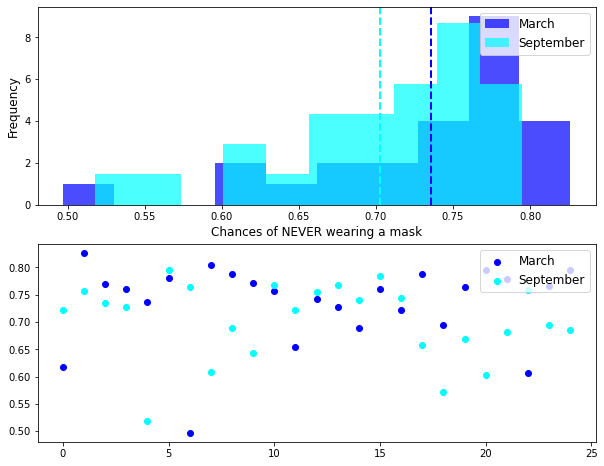

In [7]:
generatedata(df_march100['ALWAYS'],df_sept100['ALWAYS'])

(0.06557824773209098, 0.02272000000000001, 0.030040000000000018)

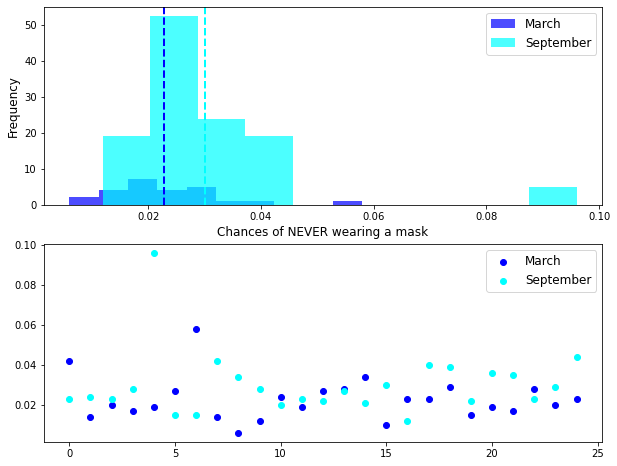

In [8]:
generatedata(df_march100['NEVER'],df_sept100['NEVER'])

In [11]:
output=os.path.join('Resources','ktop100latlng.csv')
ktop100=pd.read_csv(output)

In [12]:
top5=ktop100.head()
top5

,date,county,state,fips,cases_x,deaths,cases_y,rate,Population,Latitude,Longitude
0,9/8/2020,Tehama,California,6103.0,453,1,4,112.250000,144905,40.027102,-122.123323
1,9/8/2020,Bingham,Idaho,16011.0,676,9,7,95.571429,121264,43.211230,-112.362415
2,9/8/2020,Stone,Missouri,29209.0,316,2,4,78.000000,121684,36.774888,-93.459933
3,9/8/2020,Sebastian,Arkansas,5131.0,3042,38,40,75.050000,142299,35.226040,-94.315422
4,9/8/2020,Portage,Wisconsin,55097.0,798,2,11,71.545455,143879,43.539149,-89.462620


In [25]:
pt_locations =ktop100[['Latitude','Longitude']]
pt_cases=ktop100['rate'].astype(float)
pt_maxx=ktop100['rate'].max()


In [26]:
fig=gmaps.figure()
heat_layer=gmaps.heatmap_layer(pt_locations,weights=pt_cases,dissipating=False,max_intensity=pt_maxx,point_radius=0.9)

In [27]:
fig.add_layer(heat_layer)

In [28]:
fig

Figure(layout=FigureLayout(height='420px'))

In [31]:
info_box_template = """
<dl>
<dt>County</dt><dd>{county}</dd>
<dt>State</dt><dd>{state}</dd>
<dt>Cases</dt><dd>{rate}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
covid_info = [info_box_template.format(**row) for index, row in top5.iterrows()]
locations = top5[["Latitude","Longitude"]]


In [32]:
marker_layer=gmaps.marker_layer(locations,info_box_content=covid_info)
fig.add_layer(marker_layer)

In [33]:
fig

Figure(layout=FigureLayout(height='420px'))

# Mobility Analysis

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
#import merged mobility & cases data
file_path = os.path.join("Resources","mobility_cases_by_area.csv")

df_mobility = pd.read_csv(file_path, index_col="Area Name")

df_mobility = df_mobility.sort_values("Date", ascending=True, inplace=False)
df_mobility=df_mobility.dropna()
df_mobility

#import merged mobility (2-weeks adjusted) & cases data
file_path2 = os.path.join("Resources","mobility_cases_by_area2.csv")
df_mobility2 = pd.read_csv(file_path2, index_col="Area Name")

df_mobility2 = df_mobility2.sort_values("Date", ascending=True, inplace=False)
df_mobility2=df_mobility2.dropna()

In [2]:
#Add Preidentified Top 5 Locations from k100 df to a list for further analysis
C_top5= ['Tehama, California', 'Madison, Arkansas', 'Sebastian, Arkansas', 'Meade, South Dakota', 'Bingham, Idaho']

In [3]:
#Mobility Case dfs for top 5
df_ctop1 = df_mobility.loc[C_top5[0]]
df_ctop2 = df_mobility.loc[C_top5[1]]
df_ctop3 = df_mobility.loc[C_top5[2]]
df_ctop4 = df_mobility.loc[C_top5[3]]
df_ctop5 = df_mobility.loc[C_top5[4]]

#Mobility Case dfs for top 5 (2 weeks incubation period)
df_ctop1a = df_mobility2.loc[C_top5[0]]
df_ctop2a = df_mobility2.loc[C_top5[1]]
df_ctop3a = df_mobility2.loc[C_top5[2]]
df_ctop4a = df_mobility2.loc[C_top5[3]]
df_ctop5a = df_mobility2.loc[C_top5[4]]

### Sample 1

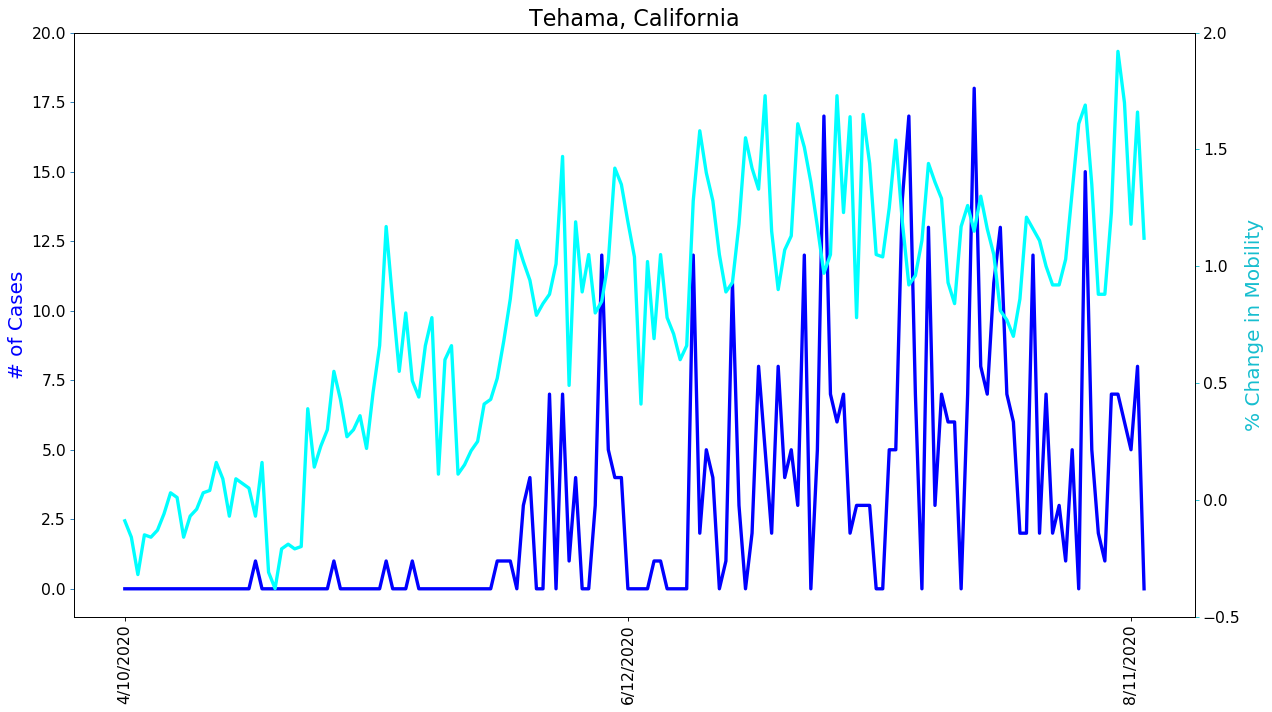

In [4]:
#Define x,y variables
x1 = df_ctop1["Date"]
cas1 = df_ctop1["Daily Cases"]
mob1 = df_ctop1["Mobility % change"]


# Plot Cases (Left Y Axis)
fig, y1a = plt.subplots(1,1,figsize = (16,9), dpi = 80, )
y1a.plot(x1, cas1, color="blue", linewidth=3)

# Plot Mobility (Right Y Axis)
y1b = y1a.twinx() # create a second axes that shares the same x-axis
y1b.plot(x1, mob1, color="cyan", linewidth=3)



# Formatting
y1a.tick_params(axis='x', rotation=90, labelsize=14)
y1a.set_ylabel('# of Cases', color='blue', fontsize = 18)
y1a.tick_params(axis='y', rotation=0, color='tab:blue', labelsize=14)
y1a.set_ylim(-1,20)

y1b.set_ylabel('% Change in Mobility', color='tab:cyan', fontsize = 18)
y1b.tick_params(axis='y', color='tab:cyan', labelsize=14)
y1b.set_xticks(np.arange(0, len(x1), 77))
y1b.set_xticklabels(x1[::60], rotation=90, fontdict={'fontsize':10})
y1b.set_ylim(-0.5,2)

y1b.set_title(C_top5[0], fontsize=20)
fig.tight_layout()

#Save image to file
file_path1 = os.path.join("Resources","Images","Linegraph_sample1.png")
plt.savefig(file_path1)
plt.show()

In [5]:
# Create a regression line 
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stdprr) = linregress(mob1.astype(float),cas1.astype(float))
regress_values = mob1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))
line_eq

'y = 3.8x + -0.09'

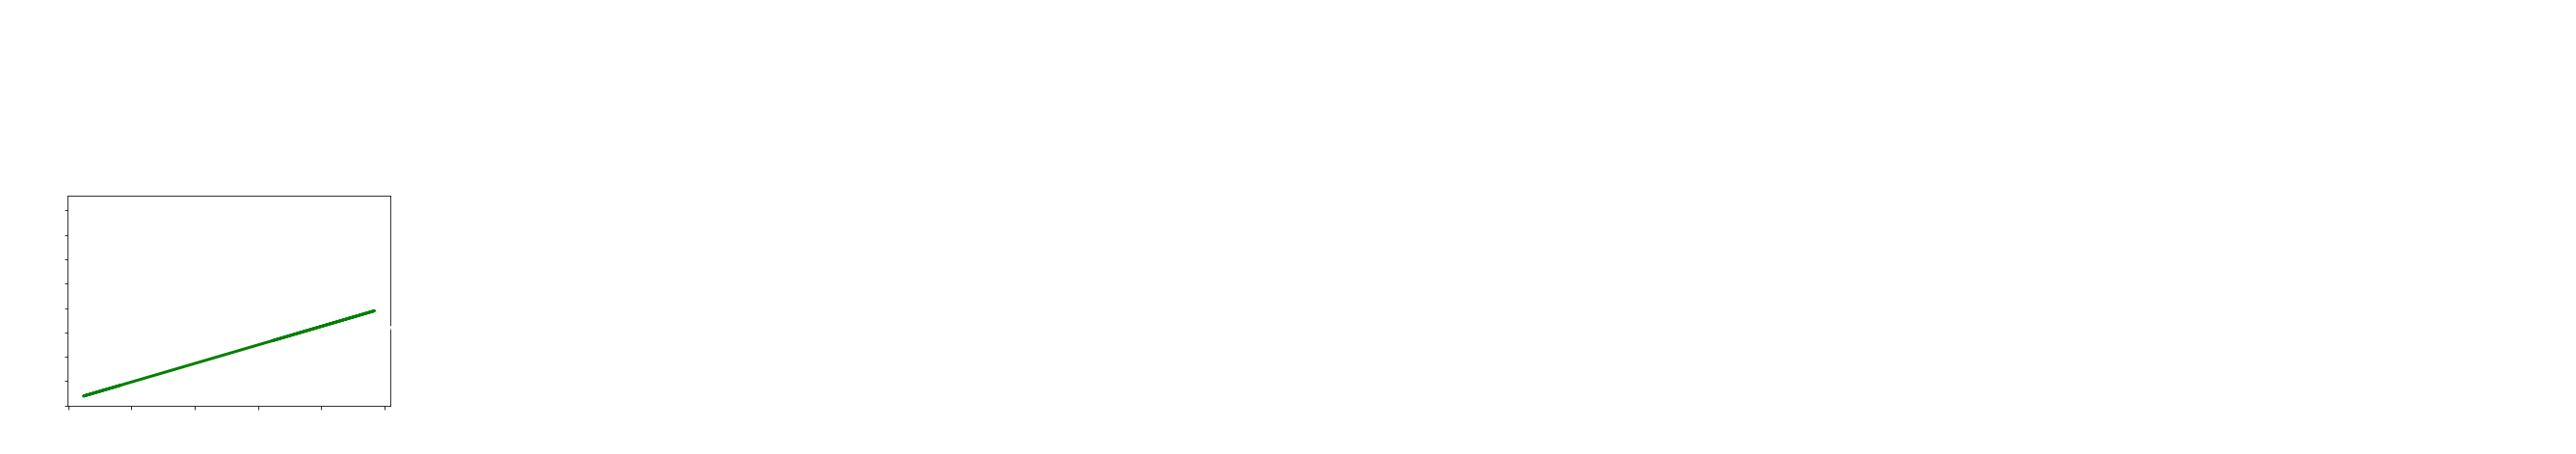

In [6]:
#Create scatter plot
plt.scatter(mob1, cas1, c = "white" )
plt.rcParams.update({'figure.figsize':(16,9), 'figure.dpi':100})
plt.plot(mob1, regress_values, "green", linewidth=3)
plt.annotate(line_eq,(18,37), color = "white", fontsize = 20)
plt.annotate(line_eq,(2.0,5.0),fontsize=14,color="white")
plt.xlabel("Change in Mobility", fontsize = 18, color = "white")
plt.xticks(rotation = 0, color = 'white', fontsize = 14)
plt.ylabel("Daily Cases", fontsize = 18, color = "white")
plt.yticks(rotation = 0, color = 'white', fontsize = 14)
plt.title(C_top5[0], fontsize = 20, color = "white")

# Save image to file
file_path1b = os.path.join("Resources","Images","scatterplot_sample1.png")
plt.savefig(file_path1b, transparent = True)
plt.show()

In [7]:
c1 = sts.pearsonr(mob1,cas1)
c1

(0.5081906751648264, 1.0890313493377746e-11)

In [8]:
#What if we shift mobility trends out by 2 weeks? 

#Define variables for new mobility trends
cas1a = df_ctop1a["Daily Cases"]
mob1a = df_ctop1a["Mobility % change"]

# Create a regression line
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stdprr) = linregress(mob1a.astype(float),cas1a.astype(float))
regress_values = mob1a * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))
line_eq

'y = 3.94x + 0.41'

In [9]:
#Pearsons correlation test
c1a = sts.pearsonr(mob1a,cas1a)
c1a

(0.5629112528374757, 1.674616347565578e-14)

### Sample 2

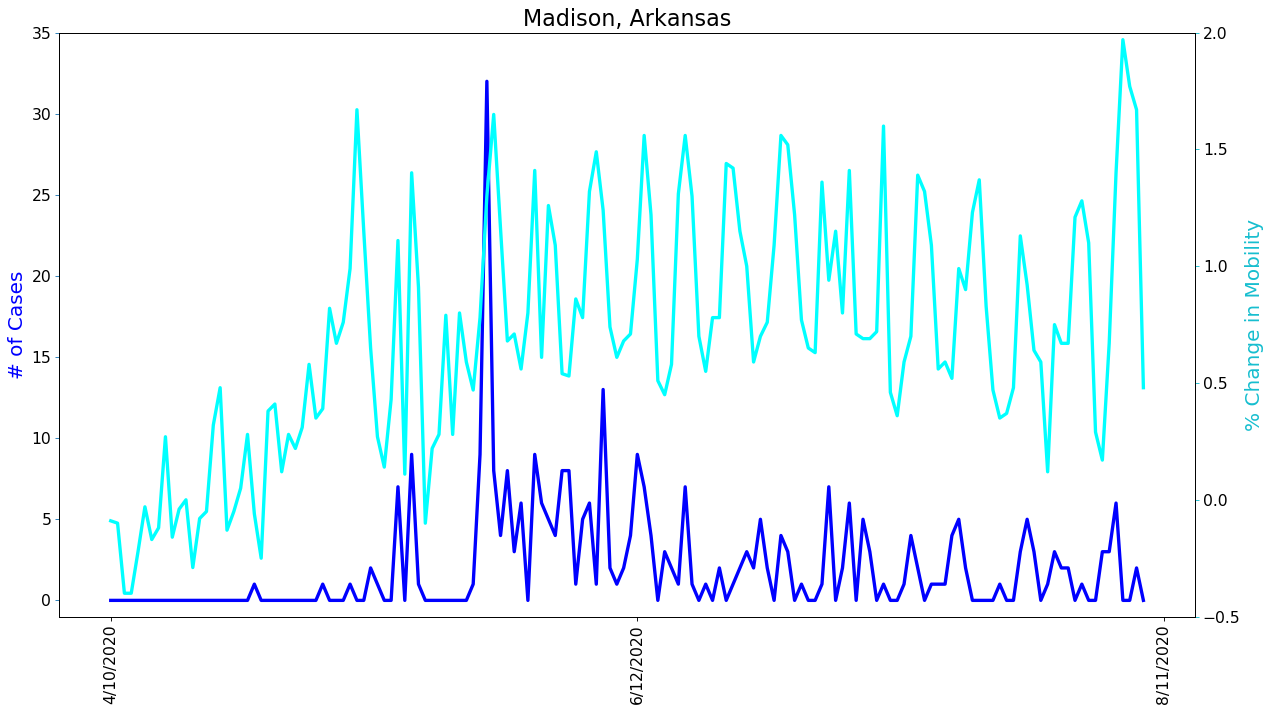

In [10]:
#Define x,y variables
x2 = df_ctop2["Date"]
cas2 = df_ctop2["Daily Cases"]
mob2 = df_ctop2["Mobility % change"]


# Plot Cases (Left Y Axis)
fig, y2a = plt.subplots(1,1,figsize = (16,9), dpi = 80)
y2a.plot(x2, cas2, color="blue", linewidth=3)

# Plot Mobility (Right Y Axis)
y2b = y2a.twinx() # create a second axes that shares the same x-axis
y2b.plot(x2, mob2, color="cyan", linewidth=3)


# Formatting
y2a.tick_params(axis='x', rotation=90, labelsize=14)
y2a.set_ylabel('# of Cases', color='blue', fontsize = 18)
y2a.tick_params(axis='y', rotation=0, color='tab:blue', labelsize=14)
y2a.set_ylim(-1,35)

y2b.set_ylabel('% Change in Mobility', color='tab:cyan', fontsize = 18)
y2b.tick_params(axis='y', color='tab:cyan', labelsize=14)
y2b.set_xticks(np.arange(0, len(x1), 77))
y2b.set_xticklabels(x1[::60], rotation=90, fontdict={'fontsize':10})
y2b.set_ylim(-0.5,2)


y2b.set_title(C_top5[1], fontsize=20)


fig.tight_layout()
file_path1 = os.path.join("Resources","Images","Linegraph_sample2.png")
plt.savefig(file_path1)
plt.show()

In [11]:
# Create a regression line
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stdprr) = linregress(mob2.astype(float),cas2.astype(float))
regress_values = mob2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))
line_eq


'y = 2.44x + 0.33'

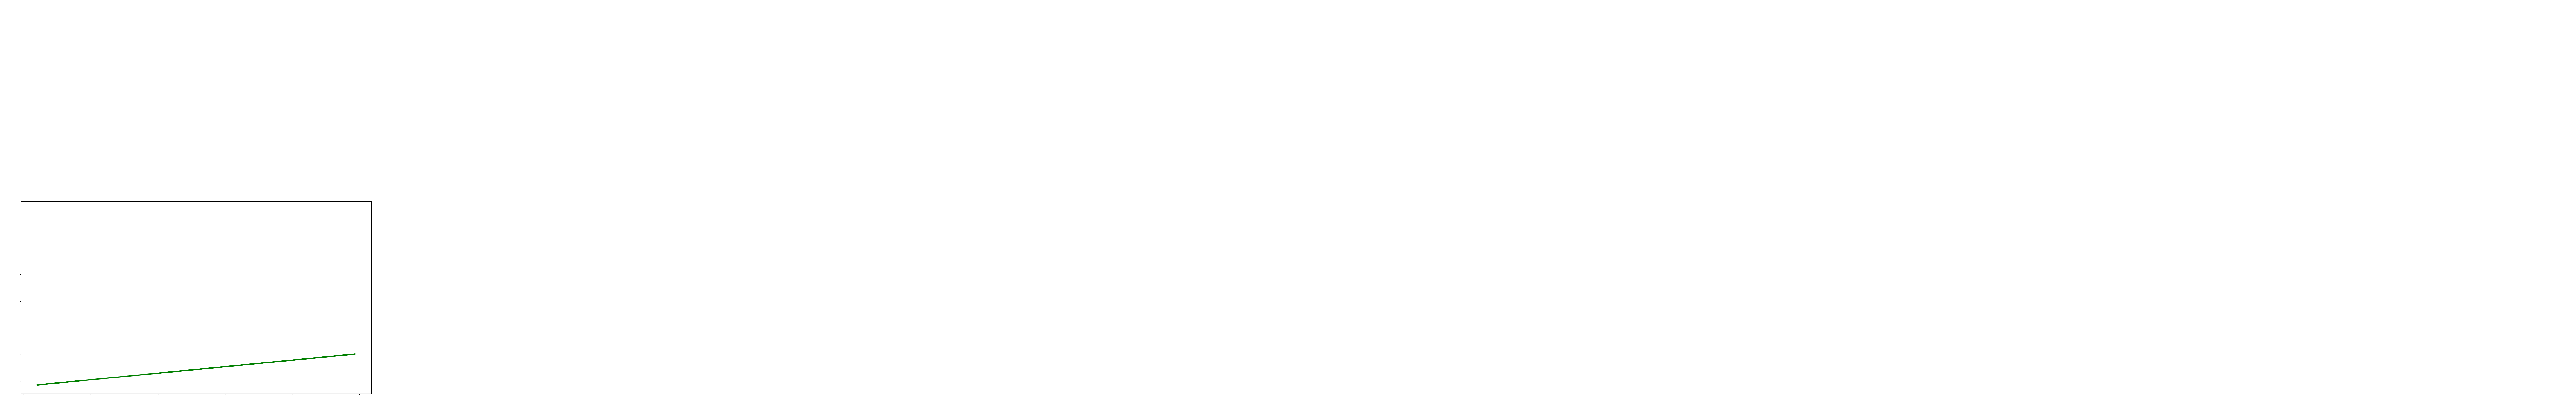

In [12]:
#Create scatter plot
plt.scatter(mob2, cas2, c = "white" )
plt.rcParams.update({'figure.figsize':(16,9), 'figure.dpi':100})
plt.plot(mob2, regress_values, color = "green", linewidth=3)
plt.annotate(line_eq,(18,37), color = "white", fontsize = 20)
plt.annotate(line_eq,(-0.20,70),fontsize=14,color="white")
plt.xlabel("Change in Mobility", fontsize = 18, color = "white")
plt.xticks(rotation = 0, color = 'white', fontsize = 14)
plt.ylabel("Daily Cases", fontsize = 18, color = "white")
plt.yticks(rotation = 0, color = 'white', fontsize = 14)
plt.title(C_top5[1], fontsize = 20, color = "white")

# Save image to file
file_path2b = os.path.join("Resources","Images","scatterplot_sample2.png")
plt.savefig(file_path2b, transparent = True)
plt.show()

In [13]:
#Pearsons correlation test
c2 = sts.pearsonr(mob2,cas2)
c2

(0.3494045435610098, 1.0239094628463903e-05)

In [14]:
#What if we shift mobility trends out by 2 weeks? 

#Define variables for new mobility trends
cas2a = df_ctop2a["Daily Cases"]
mob2a = df_ctop2a["Mobility % change"]

# Create a regression line
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stdprr) = linregress(mob2a.astype(float),cas2a.astype(float))
regress_values = mob2a * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))
line_eq

'y = 1.8x + 0.97'

In [15]:
c2a = sts.pearsonr(mob2a,cas2a)
c2a

(0.27684539456834434, 0.0005549208273584098)

### Sample 3

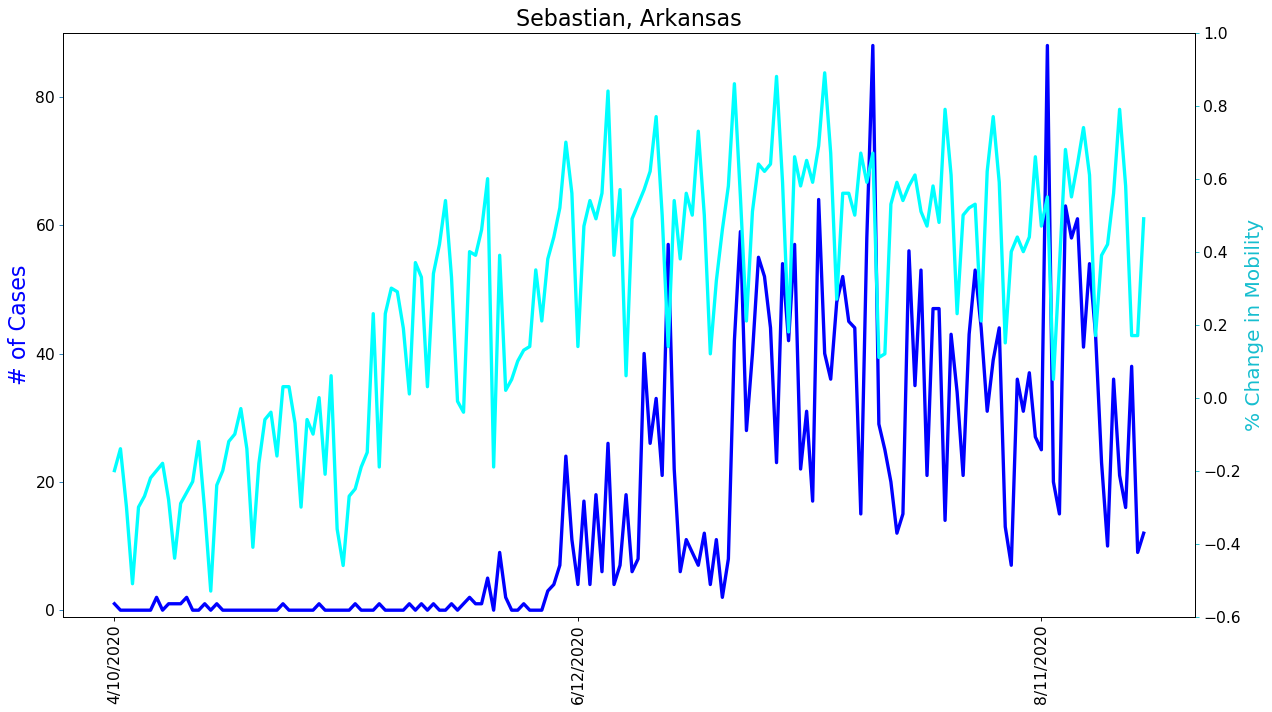

In [16]:
#Define x,y variables
x3 = df_ctop3["Date"]
cas3 = df_ctop3["Daily Cases"]
mob3 = df_ctop3["Mobility % change"]


# Plot Cases (Left Y Axis)
fig, y3a = plt.subplots(1,1,figsize = (16,9), dpi = 80)
y3a.plot(x3, cas3, color="blue", linewidth = 3)

# Plot Mobility (Right Y Axis)
y3b = y3a.twinx() # create a second axes that shares the same x-axis
y3b.plot(x3, mob3, color="cyan", linewidth = 3)



# Formatting
y3a.tick_params(axis='x', rotation=90, labelsize=14)
y3a.set_ylabel('# of Cases', color='blue', fontsize = 20)
y3a.tick_params(axis='y', rotation=0, color='tab:blue', labelsize=14)
y3a.set_ylim(-1,90)

y3b.set_ylabel('% Change in Mobility', color='tab:cyan', fontsize = 18)
y3b.tick_params(axis='y', color='tab:cyan', labelsize=14)
y3b.set_xticks(np.arange(0, len(x1), 77))
y3b.set_xticklabels(x1[::60], rotation=90, fontdict={'fontsize':10})
y3b.set_ylim(-0.6,1)


y3b.set_title(C_top5[2], fontsize=20)

fig.tight_layout()

# Save image to file
file_path1 = os.path.join("Resources","Images","Linegraph_sample3.png")
plt.savefig(file_path1)
plt.show()

In [17]:
# Create a regression line
(slope, intercept, rvalue, pvalue, stdprr) = linregress(mob3.astype(float),cas3.astype(float))
regress_values = mob3 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))
line_eq

'y = 36.03x + 7.58'

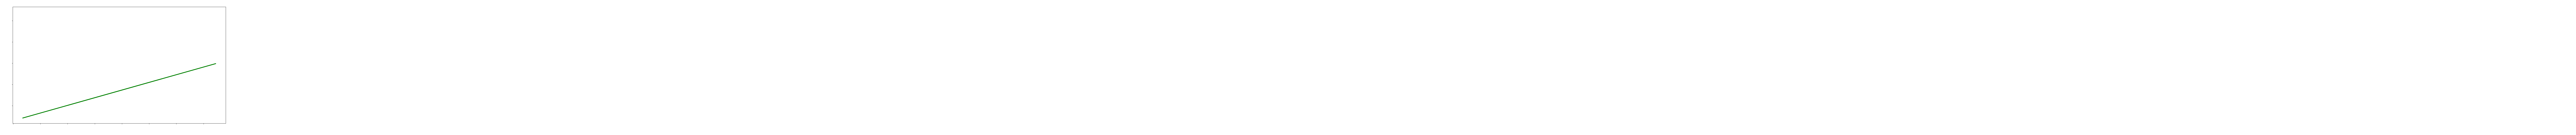

In [138]:
#Create scatterplot
plt.scatter(mob3, cas3, c = "white" )
plt.rcParams.update({'figure.figsize':(16,9), 'figure.dpi':100})
plt.plot(mob3, regress_values, "green", linewidth=3)
plt.annotate(line_eq,(18,37), color = "white", fontsize = 15)
plt.annotate(f"R2 = {round(rvalue**2,3)}",(18,36),fontsize=14,color="white")
plt.xlabel("Change in Mobility", fontsize = 18, color = "white")
plt.xticks(rotation = 0, color = 'white', fontsize = 14)
plt.ylabel("Daily Cases", fontsize = 18, color = "white")
plt.yticks(rotation = 0, color = 'white', fontsize = 14)
plt.title(C_top5[2], fontsize = 20, color = "white")

# Save image to file
file_path3b = os.path.join("Resources","Images","scatterplot_sample3.png")
plt.savefig(file_path3b, transparent = True)
plt.show()

In [139]:
#Pearsons correlation test
c3 = sts.pearsonr(mob3,cas3)
c3

(0.6037963663934813, 1.8265989941223974e-18)

In [140]:
#What if we shift mobility trends out by 2 weeks? 

#Define variables for new mobility trends
cas3a = df_ctop3a["Daily Cases"]
mob3a = df_ctop3a["Mobility % change"]

# Create a regression line
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stdprr) = linregress(mob3a.astype(float),cas3a.astype(float))
regress_values = mob3a * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))
line_eq

'y = 40.32x + 8.03'

In [141]:
#Pearsons correlation test
c3a = sts.pearsonr(mob3a,cas3a)
c3a

(0.6707977007585895, 7.750383258073702e-24)

### Sample 4

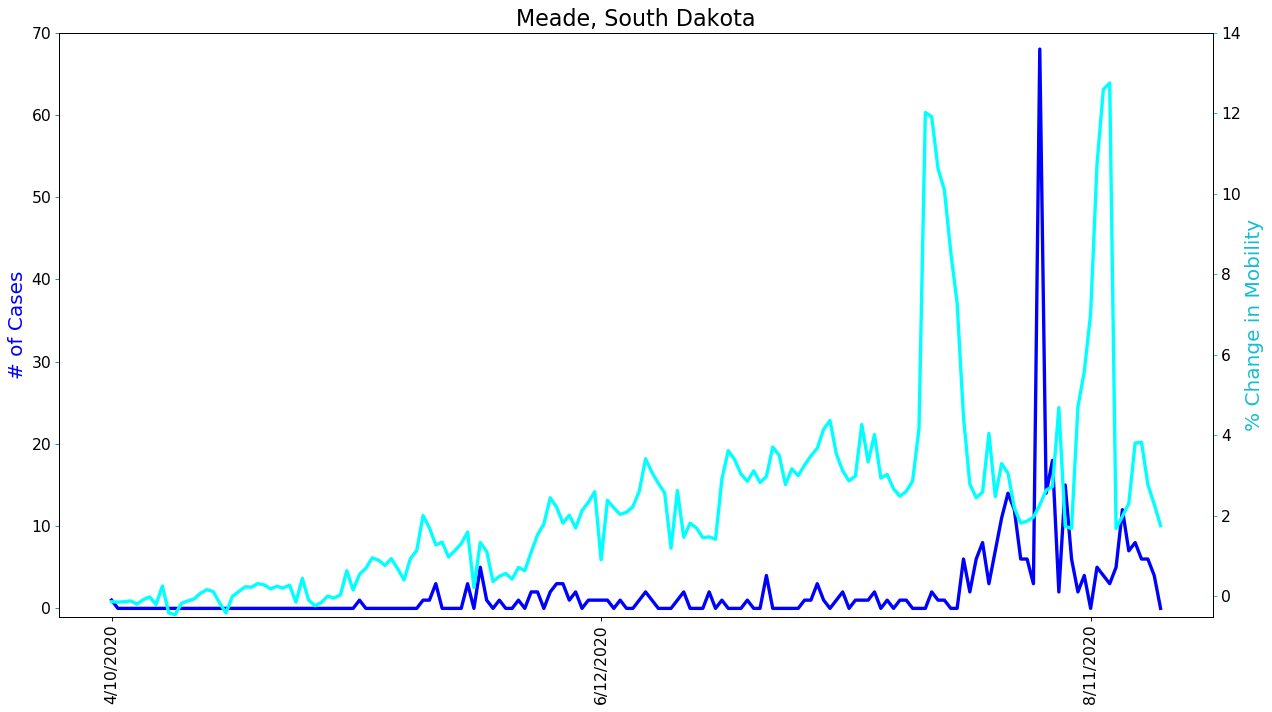

In [142]:
#Define x,y variables
x4 = df_ctop4["Date"]
cas4 = df_ctop4["Daily Cases"]
mob4 = df_ctop4["Mobility % change"]


# Plot Cases (Left Y Axis)
fig, y4a = plt.subplots(1,1,figsize = (16,9), dpi = 80)
y4a.plot(x4, cas4, color="blue", linewidth = 3)

# Plot Mobility (Right Y Axis)
y4b = y4a.twinx() # create a second axes that shares the same x-axis
y4b.plot(x4, mob4, color="cyan", linewidth = 3)

# Formatting
y4a.tick_params(axis='x', rotation=90, labelsize=14)
y4a.set_ylabel('# of Cases', color='blue', fontsize = 18)
y4a.tick_params(axis='y', rotation=0, color='tab:blue', labelsize=14)
y4a.set_ylim(-1,70)

y4b.set_ylabel('% Change in Mobility', color='tab:cyan', fontsize = 18)
y4b.tick_params(axis='y', color='tab:cyan', labelsize=14)
y4b.set_xticks(np.arange(0, len(x1), 77))
y4b.set_xticklabels(x1[::60], rotation=90, fontdict={'fontsize':10})
y4b.set_ylim(-0.5,14)

y4b.set_title(C_top5[3], fontsize=20)
fig.tight_layout()

# Save image to file
file_path1 = os.path.join("Resources","Images","Linegraph_sample4.png")
plt.savefig(file_path1)
plt.show()

In [156]:
# Create a regression line
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stdprr) = linregress(mob4.astype(float),cas4.astype(float))
regress_values = mob4 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))
line_eq

'y = 0.23x + 1.58'

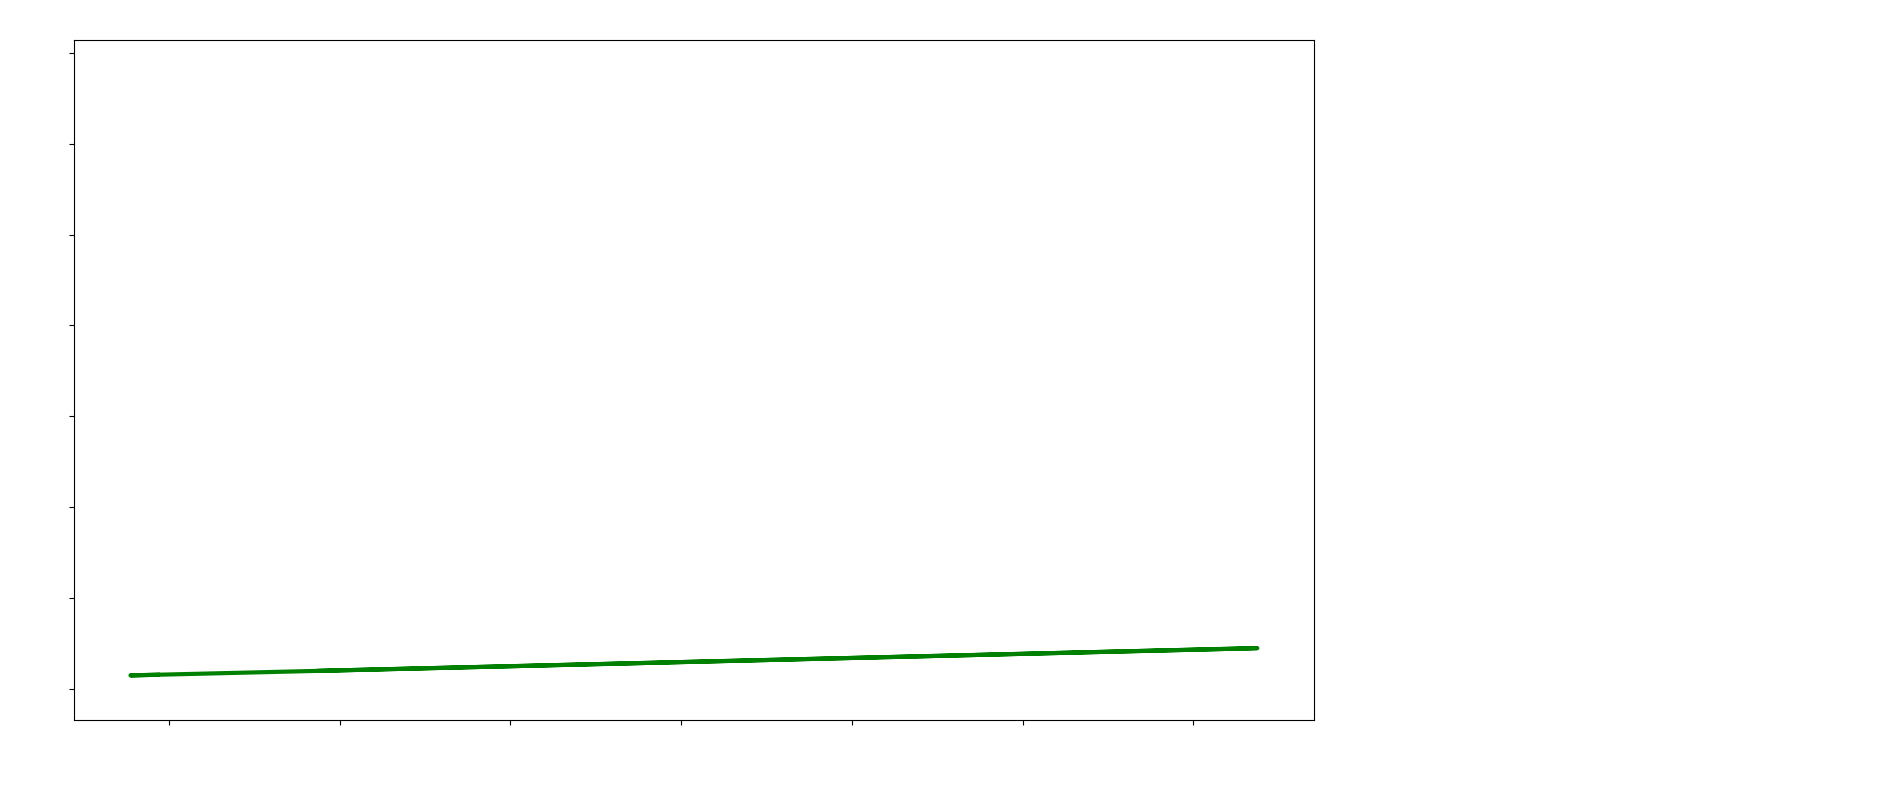

In [157]:
#Create scatterplot
plt.scatter(mob4, cas4, c = "white" )
plt.plot(mob4, regress_values, "green", linewidth=3)
plt.annotate(line_eq,(18,47), color = "white", fontsize = 15)
plt.annotate(line_eq,(11.0,8.0),fontsize=14,color="white")
plt.xlabel("Change in Mobility", fontsize = 18, color = "white")
plt.xticks(rotation = 0, color = 'white', fontsize = 14)
plt.ylabel("Daily Cases", fontsize = 18, color = "white")
plt.yticks(rotation = 0, color = 'white', fontsize = 14)
plt.title(C_top5[3], fontsize = 20, color = "white")

# Save image to file
file_path4b = os.path.join("Resources","Images","scatterplot_sample4.png")
plt.savefig(file_path4b, transparent = True)
plt.show()

In [145]:
#Pearsons correlation test
c4 = sts.pearsonr(mob4,cas4)
c4

(0.09443405293892815, 0.22619817706332274)

In [146]:
#What if we shift mobility trends out by 2 weeks? 

#Define variables for new mobility trends
cas4a = df_ctop4a["Daily Cases"]
mob4a = df_ctop4a["Mobility % change"]

# Create a regression line
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stdprr) = linregress(mob4a.astype(float),cas4a.astype(float))
regress_values = mob4a * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))
line_eq

'y = 1.22x + -0.35'

In [147]:
# Pearsons correlation test
c4a = sts.pearsonr(mob4a,cas4a)
c4a

(0.5231833601843001, 4.77539384699831e-13)

### Sample 5

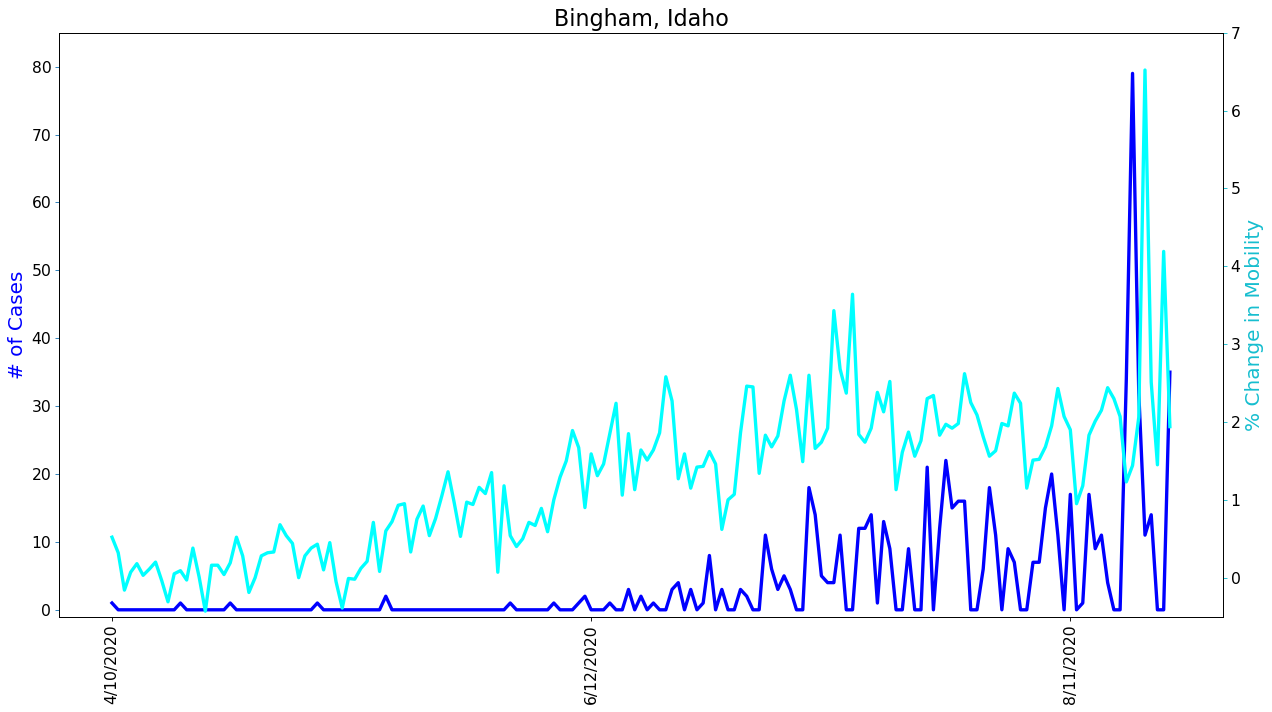

In [148]:
#Define x,y variables
x5 = df_ctop5["Date"]
cas5 = df_ctop5["Daily Cases"]
mob5 = df_ctop5["Mobility % change"]


# Plot Cases (Left Y Axis)
fig, y5a = plt.subplots(1,1,figsize = (16,9), dpi = 80)
y5a.plot(x5, cas5, color="blue", linewidth=3)

# Plot Mobility (Right Y Axis)
y5b = y5a.twinx() # create a second axes that shares the same x-axis
y5b.plot(x5, mob5, color="cyan", linewidth=3)



# Formatting
# y5a.set_xlabel('Date', fontsize = 18)
y5a.tick_params(axis='x', rotation=90, labelsize=14)
y5a.set_ylabel('# of Cases', color='blue', fontsize = 18)
y5a.tick_params(axis='y', rotation=0, color='tab:blue', labelsize=14)
y5a.set_ylim(-1,85)

y5b.set_ylabel('% Change in Mobility', color='tab:cyan', fontsize = 18)
y5b.tick_params(axis='y', color='tab:cyan', labelsize=14)
y5b.set_xticks(np.arange(0, len(x1), 77))
y5b.set_xticklabels(x1[::60], rotation=90, fontdict={'fontsize':10})
y5b.set_ylim(-0.5,7)

y5b.set_title(C_top5[4], fontsize=20)

fig.tight_layout()

# Save image to file
file_path1 = os.path.join("Resources","Images","Linegraph_sample5.png")
plt.savefig(file_path4b, transparent = True)
plt.show()

In [149]:
# Create a regression line
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stdprr) = linregress(mob5.astype(float),cas5.astype(float))
regress_values = mob5 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))
line_eq

'y = 2.83x + 0.32'

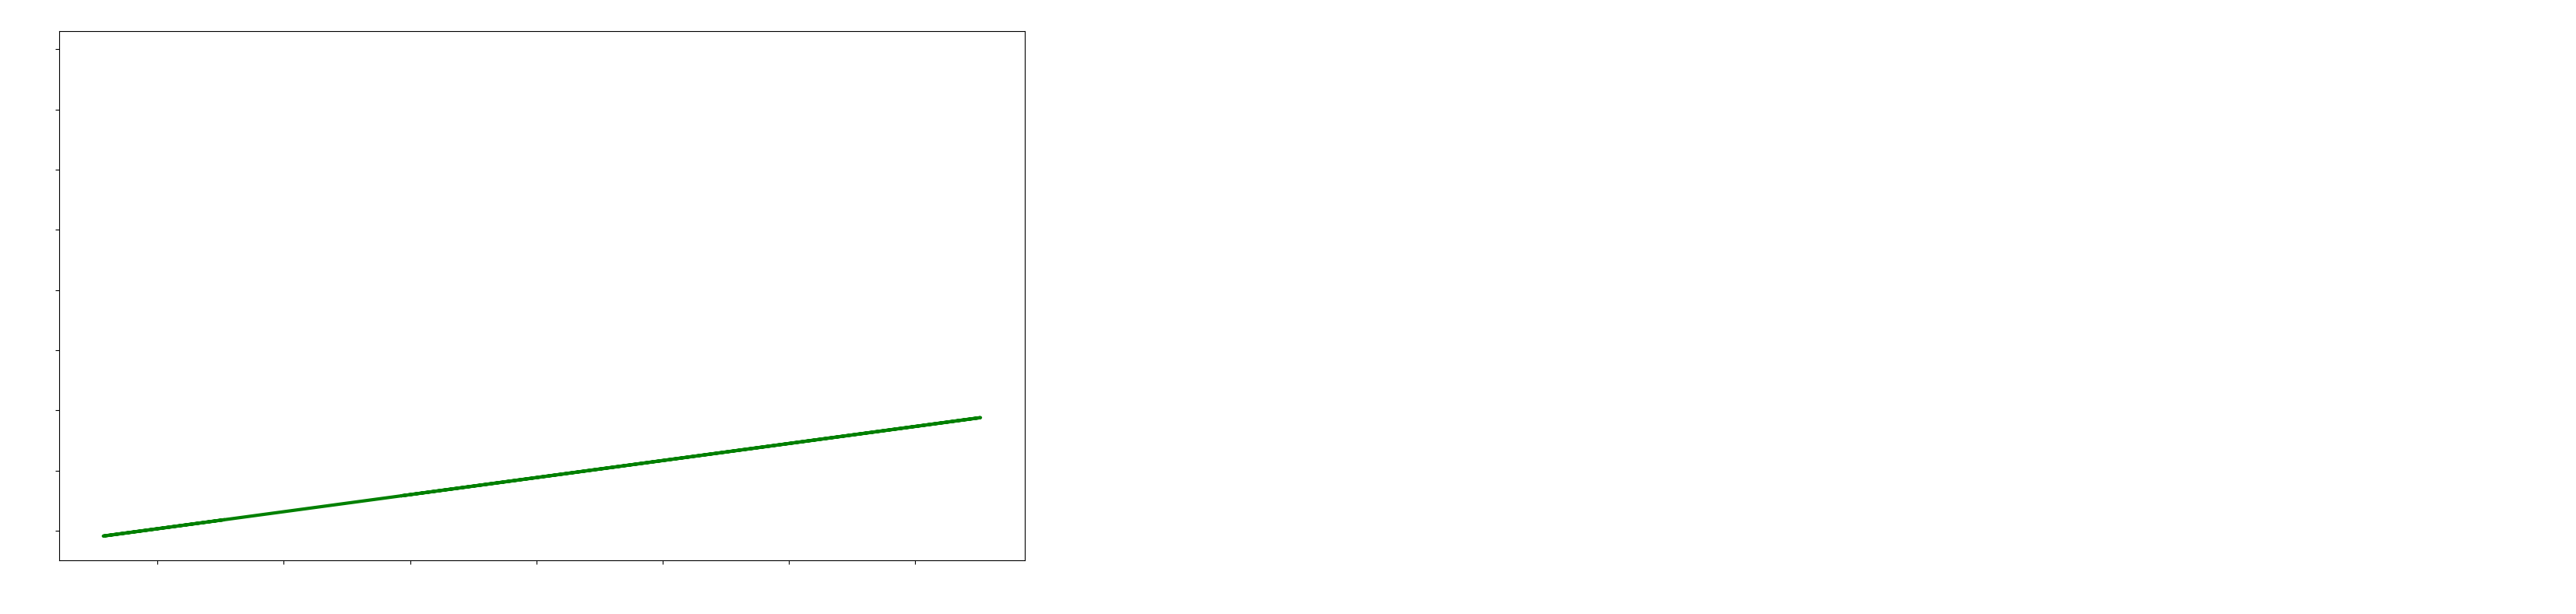

In [150]:
# Create scatterplot
plt.scatter(mob5, cas5, c = "white" )
plt.rcParams.update({'figure.figsize':(16,9), 'figure.dpi':100})
plt.plot(mob5, regress_values, "green", linewidth=3)
plt.annotate(line_eq,(18,37), color = "white", fontsize = 15)
plt.annotate(line_eq,(5.0,8.0),fontsize=15,color="white")
plt.xlabel("Change in Mobility", fontsize = 18, color = "white")
plt.xticks(rotation = 0, color = 'white', fontsize = 15)
plt.ylabel("Daily Cases", fontsize = 18, color = "white")
plt.yticks(rotation = 0, color = 'white', fontsize = 15)
plt.title(C_top5[4], fontsize = 20, color = "white")
file_path5b = os.path.join("Resources","Images","scatterplot_sample5.png")
plt.savefig(file_path5b, transparent = True)
plt.show()

In [151]:
#Pearsons correlation test
c5 = sts.pearsonr(mob5,cas5)
c5

(0.31089593015299233, 3.4926895684390565e-05)

In [153]:
#What if we shift mobility trends out by 2 weeks?


#Define variables for new mobility trends
cas5a = df_ctop5a["Daily Cases"]
mob5a = df_ctop5a["Mobility % change"]

# Create a regression line
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stdprr) = linregress(mob5a.astype(float),cas5a.astype(float))
regress_values = mob5a * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))
line_eq

'y = 4.45x + -0.82'

In [155]:
#Pearsons correlation test
c5a = sts.pearsonr(mob5a,cas5a)
c5a

(0.43330677481263496, 3.2266492063556724e-09)